# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>
Binary Classification pada Dataset NHANES Age Prediction  menggunakan k-NN dan Naive Bayes

<b>Kelompok 1: </b>

Anggota:
1. Joshua Pinem - 1301223051
2. Zaky Al Fatih Nata Imam - 1301223172
3. Adzkia Rahma Anggraeni - 1301223284

#### Pendahuluan
Dataset yang dipilih merupakan dataset dari National Health and Nutrition Examination Survey (NHANES) yang dikelola oleh Centers for Disease Control and Prevention (CDC). Data dari NHANES dibuat untuk menilai status kesehatan kesehatan dan nutrisi dari orang dewasa dan anak-anak di Amerika Serikat. Dataset yang diberikan bertujuan untuk diolah dan berfokus pada prediksi usia yang ada pada data. Pada data ini, terdapat label "senior" dan "adult", adapun jumlah baris pada data ini adalah 2278 baris dengan 10 kolom.

Adapun nama-nama kolom pada dataset ini beserta keterangannya adalah sebagai berikut:
*   SEQN : Respondent Seuquence Number
*   age_group : Kelompok usia responden
*   RIDAGEYR : Umur responden
*   RIAGENDR : Gender responden
*   PAQ605 : Intensitas olahraga responden
*   BMIXBMI : Index BMI responden
*   LBXGLU : Gula darah responden setelah puasa
*   DIQ010 : Jika responden diabetes
*   LBXGLT : Oral responden
*   LBXIN : Level insulin responden

Sebelum dibuat suatu model kNN dan Naive Bayes, akan dilakukan beberapa tahapan pengolahan data. Tahapan pengolahan data dimulai dari menganalisis data statistik pada masing-masing kolom, melakukan visualisasi data, melakukan *preprocessing* data, membagi data menjadi fold untuk cross-validation, hingga mencapai implementasi dan evaluasi model kNN dan naive bayes.

Untuk data splitting, dataset akan dibagi menjadi dua bagian, yakni 80% untuk data train, dan 20% data test. Untuk data train, akan dibagi menjadi 5 buah fold dengan ukuran sama, yang kemudian akan dilakukan proses validation untuk menentukan best hyperparameter, yang kemudian akan digunakan untuk proses pengujian model pada data testing.

##### UPLOAD DATASET

In [ ]:
# Mengunduh dataset dari GitHub
!wget https://raw.githubusercontent.com/ZakyAlFatih/DatasetPKB/main/NHANES_age_prediction.csv -O NHANES_age_prediction.csv

# Import seluruh library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset ke dalam DataFrame menggunakan pandas
df = pd.read_csv('NHANES_age_prediction.csv')

--2024-06-16 12:26:05--  https://raw.githubusercontent.com/ZakyAlFatih/DatasetPKB/main/NHANES_age_prediction.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119620 (117K) [text/plain]
Saving to: ‘NHANES_age_prediction.csv’

NHANES_age_predicti 100%[===================>] 116.82K  --.-KB/s    in 0.09s   

2024-06-16 12:26:05 (1.29 MB/s) - ‘NHANES_age_prediction.csv’ saved [119620/119620]



#####DATA VISUALIZATION (Before Preprocessing)
Tahapan visualisasi data ini akan digunakan sebagai tahapan dalam proses analisis data. Pada tahap ini, akan dilakukan proses menampilkan visual dari suatu kolom, untuk membantu dalam membuat kesimpulan dan melihat apabila ada kejanggalan pada suatu data.

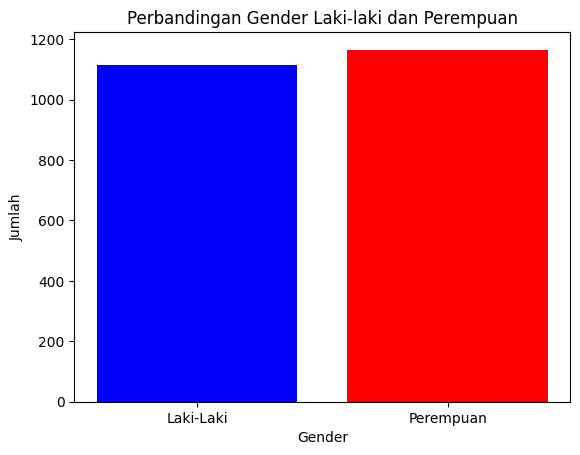

'\nAnalisis Plot:\nPada plot di bawah, bisa dilihat bahwa responden perempuan cenderung\nlebih banyak dibandingkan laki-laki. Namun tidak ada unsur keanehan pada\ndata tersebut, sehingga dianggap untuk data gender itu valid dan normal\n'

In [ ]:
'''
Menampilkan diagram batang perbandingan gender antara laki-laki
dan perempuan
'''
#Melakukan perhitungan masing-masing jumlah gender laki-laki dan perempuan
jumlahGender = df['RIAGENDR'].value_counts()
label = ['Laki-Laki','Perempuan']
nilai = [jumlahGender[1],jumlahGender[2]]

#Proses pembuatan plot diagram batang
plt.bar(label, nilai, color=['blue', 'red'])
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.title('Perbandingan Gender Laki-laki dan Perempuan')
plt.show()

'''
Analisis Plot:
Pada plot di bawah, bisa dilihat bahwa responden perempuan cenderung
lebih banyak dibandingkan laki-laki. Namun tidak ada unsur keanehan pada
data tersebut, sehingga dianggap untuk data gender itu valid dan normal
'''



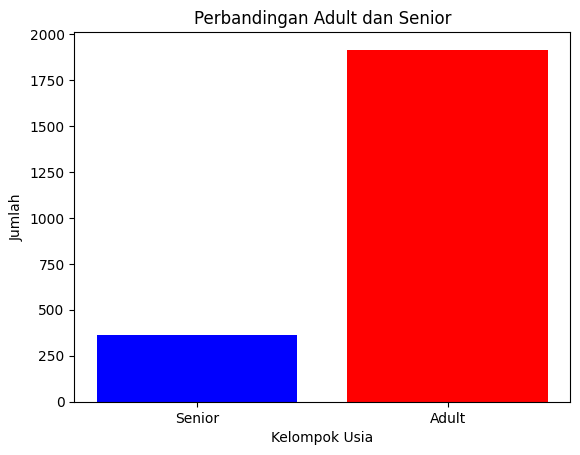

'\nAnalisis Plot:\nPada plot di bawah dapat dilihat bahwa ternyata terdapat perbedaan yang cukup\njauh antara adult dan senior. Hal ini dikarenakan responden yang dilibatkan\nlebih banyak adalah adult.  Hal ini pun tidak dapat dianggap sebagai keanehan,\nkarena ini merupakan representasi alami dari data, maka dapat dianggap bahwa\nkolom age_group valid.\n'

In [ ]:
'''
Menampilkan diagram batang perbandingan age_group
'''
#Melakukan perhitungan masing-masing jumlah adult dan senior
jumlahGender = df['age_group'].value_counts()
label = ['Senior','Adult']
nilai = [jumlahGender['Senior'],jumlahGender['Adult']]

#Proses pembuatan plot diagram batang
plt.bar(label, nilai, color=['blue', 'red'])
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah')
plt.title('Perbandingan Adult dan Senior')
plt.show()

'''
Analisis Plot:
Pada plot di bawah dapat dilihat bahwa ternyata terdapat perbedaan yang cukup
jauh antara adult dan senior. Hal ini dikarenakan responden yang dilibatkan
lebih banyak adalah adult.  Hal ini pun tidak dapat dianggap sebagai keanehan,
karena ini merupakan representasi alami dari data, maka dapat dianggap bahwa
kolom age_group valid.
'''



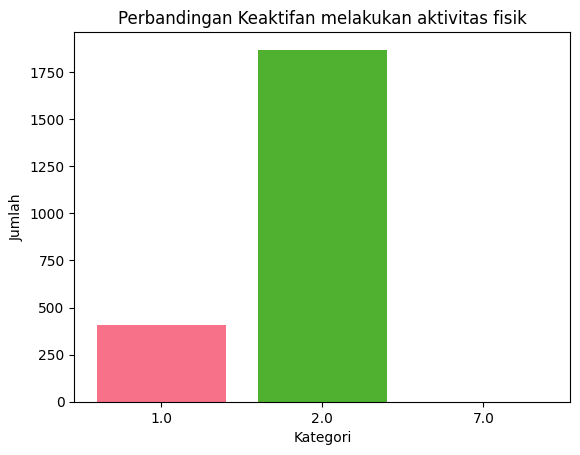

'\nAnalisis Plot:\nPada plot di bawah dapat dilihat bahwa ternyata terdapat kategori yang tidak valid.\nBerdasarkan penjelasan yang didapat dari dataset, kategori PAQ605 hanya terdiri\natas 2 kategori, yaitu 1.0 (yang berarti aktif melakukan aktivitas fisik), dan\n2.0 (tidak aktif melakukan aktivitas fisik). Sehingga data 7.0 dengan jumlah data\nsebanyak 1 dapat dinyatakan tidak valid.\n'

In [ ]:
'''
Menampilkan diagram batang perbandingan PAQ605
'''
#Melakukan perhitungan masing-masing kategori dengan menggunakan clustering
jumlahPAQ605 = df['PAQ605'].value_counts().sort_index()
jumlahPAQ605.index = jumlahPAQ605.index.map(str)

#Proses pembuatan plot diagram batang sesuai dengan jumlah kategori
palette = sns.color_palette("husl", len(jumlahPAQ605))
plt.bar(jumlahPAQ605.index, jumlahPAQ605.values, color=palette)
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Perbandingan Keaktifan melakukan aktivitas fisik')
plt.show()

'''
Analisis Plot:
Pada plot di bawah dapat dilihat bahwa ternyata terdapat kategori yang tidak valid.
Berdasarkan penjelasan yang didapat dari dataset, kategori PAQ605 hanya terdiri
atas 2 kategori, yaitu 1.0 (yang berarti aktif melakukan aktivitas fisik), dan
2.0 (tidak aktif melakukan aktivitas fisik). Sehingga data 7.0 dengan jumlah data
sebanyak 1 dapat dinyatakan tidak valid.
'''



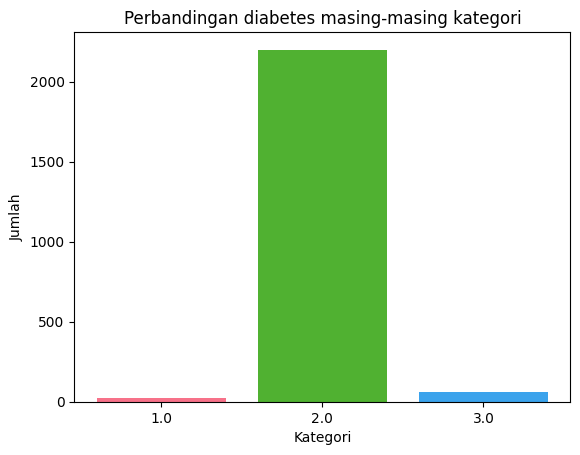

'\nAnalisis Plot:\nPada plot di bawah dapat dilihat bahwa ternyata terdapat tiga buah kategori\npada kolom DIQ010.Berdasarkan penjelasan yang didapat dari dataset, kategori\nDIQ010 hanya terdiri atas 3 kategori, yaitu 1.0 (yang berarti memiliki diabetes),\n2.0 (tidak memiliki diabetes), dan 3.0 (berada di borderline atau pradiabetes).\nSehingga data pada kolom DIQ010 dianggap valid.\n'

In [ ]:
'''
Menampilkan diagram batang perbandingan DIQ010
'''
#Melakukan perhitungan masing-masing kategori dengan menggunakan clustering
jumlahDIQ010 = df['DIQ010'].value_counts().sort_index()
jumlahDIQ010.index = jumlahDIQ010.index.map(str)

#Proses pembuatan plot diagram batang sesuai dengan jumlah kategori
palette = sns.color_palette("husl", len(jumlahPAQ605))
plt.bar(jumlahDIQ010.index, jumlahDIQ010.values, color=palette)
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Perbandingan diabetes masing-masing kategori')
plt.show()

'''
Analisis Plot:
Pada plot di bawah dapat dilihat bahwa ternyata terdapat tiga buah kategori
pada kolom DIQ010.Berdasarkan penjelasan yang didapat dari dataset, kategori
DIQ010 hanya terdiri atas 3 kategori, yaitu 1.0 (yang berarti memiliki diabetes),
2.0 (tidak memiliki diabetes), dan 3.0 (berada di borderline atau pradiabetes).
Sehingga data pada kolom DIQ010 dianggap valid.
'''



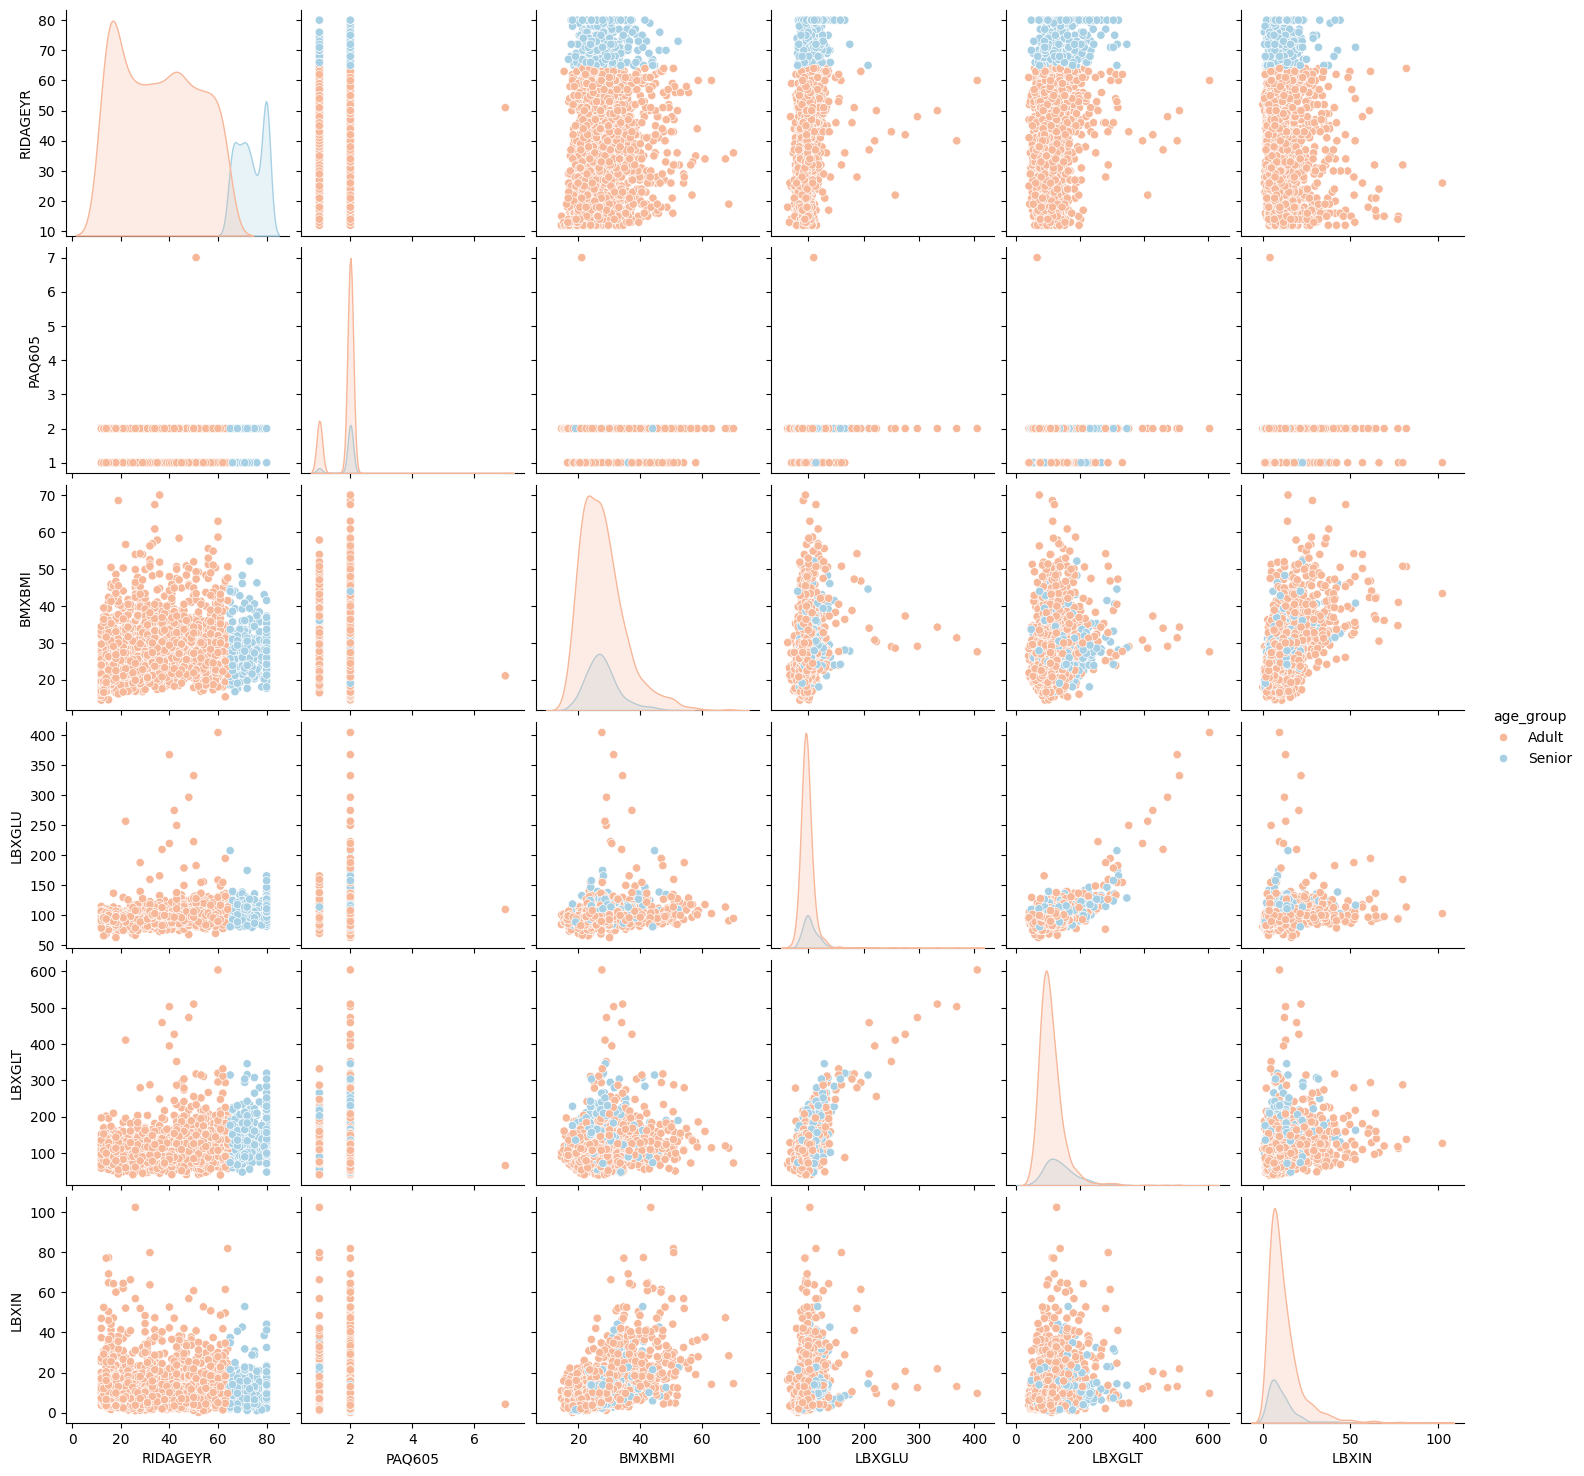

In [ ]:
'''
Menampilkan pair plot pada kolom-kolom yang mengandung data numerikal
yang mana density plot dibuat secara diagonal, dan scatter plot lainnya
'''
cols = ['age_group',
        'RIDAGEYR',
        'PAQ605',
        'BMXBMI',
        'LBXGLU',
        'LBXGLT',
        'LBXIN']
sns.pairplot(data= df[cols],hue = 'age_group',palette = 'RdBu')


In [ ]:
'''
Mengubah data kategorik pada kolom age_group menjadi
data numerik (0 untuk adult,1 untuk senior)
'''
df['age_group'].replace(['Adult','Senior'],[0,1],inplace=True)

#Tampilkan data yang sudah diproses
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


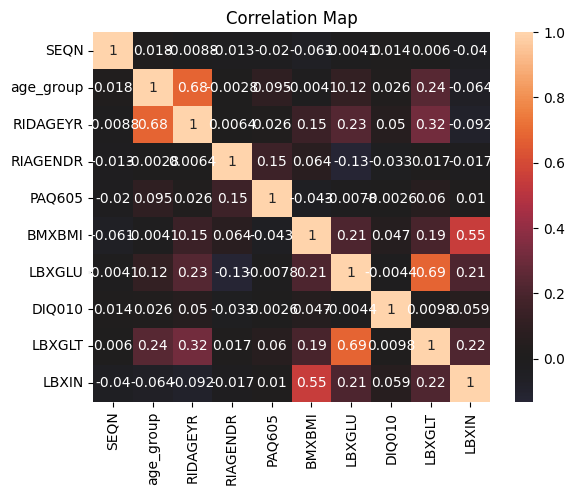

In [ ]:
'''
Menampilkan correlation matrixd atau heatmap untuk melihat korelasi antar kolom
pada dataset
'''
sns.heatmap(df.corr(),center=0,annot=True)
plt.title('Correlation Map')
plt.show()

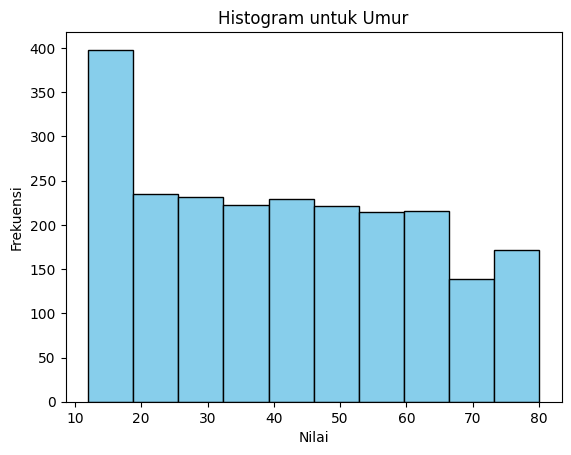

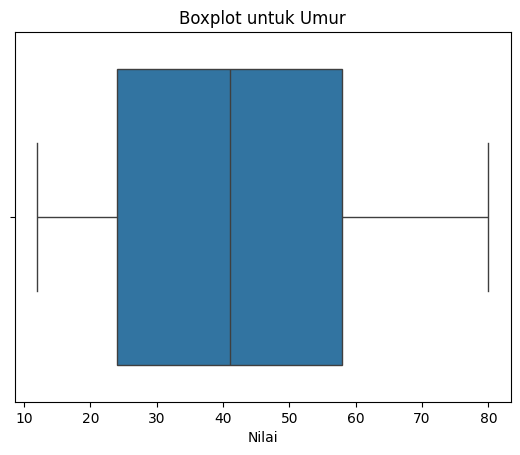

'\nAnalisis Plot:\nPada plot di bawah dapat dilihat bahwa responden ternyata dominan berada di data kiri\n(lihat boxplot). Berdasarkan visualisasi ini, tidak ditemukan data yang cukup berbeda\natau jauh dari distribusi.\n'

In [ ]:
'''
Menampilkan histogram dan boxplot pada kolom RIDAGEYR untuk mengetahui distribusi
data umur
'''

#Proses pembuatan plot histogram
plt.hist(df['RIDAGEYR'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram untuk Umur')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

#Proses pembuatan boxplot
sns.boxplot(x=df['RIDAGEYR'])
plt.title('Boxplot untuk Umur')
plt.xlabel('Nilai')
plt.show()

'''
Analisis Plot:
Pada plot di bawah dapat dilihat bahwa responden ternyata dominan berada di data kiri
(lihat boxplot). Berdasarkan visualisasi ini, tidak ditemukan data yang cukup berbeda
atau jauh dari distribusi.
'''



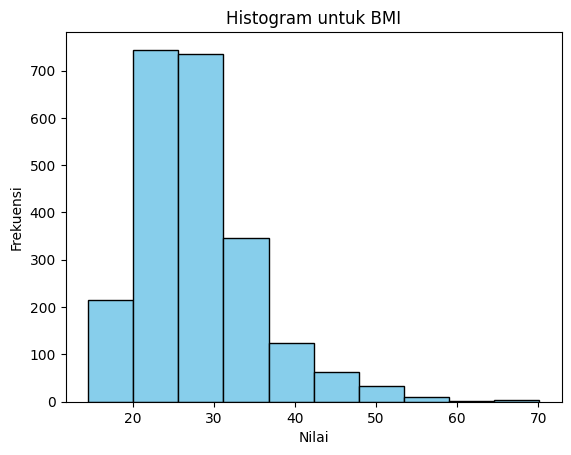

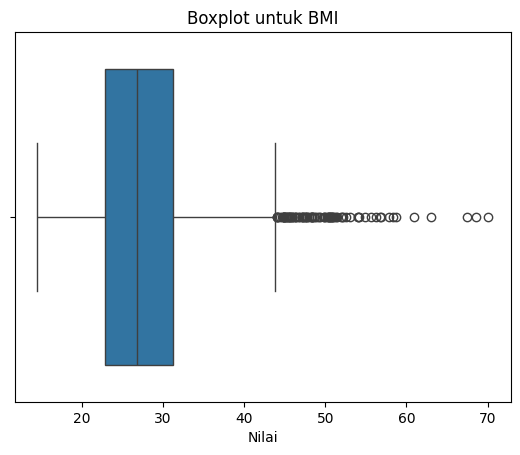

'\nAnalisis Plot:\nPada plot di bawah dapat dilihat bahwa ternyata terdapat pencilan (outlier) pada\npersebaran data BMI, dan jumlahnya cukup sedikit apabila dibandingkan dengan\ntotal data keseluruhan\n'

In [ ]:
'''
Menampilkan histogram dan boxplot pada kolom BMXBMI untuk mengetahui distribusi
data BMI
'''

#Proses pembuatan plot histogram
plt.hist(df['BMXBMI'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram untuk BMI')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

#Proses pembuatan boxplot
sns.boxplot(x=df['BMXBMI'])
plt.title('Boxplot untuk BMI')
plt.xlabel('Nilai')
plt.show()

'''
Analisis Plot:
Pada plot di bawah dapat dilihat bahwa ternyata terdapat pencilan (outlier) pada
persebaran data BMI, dan jumlahnya cukup sedikit apabila dibandingkan dengan
total data keseluruhan
'''



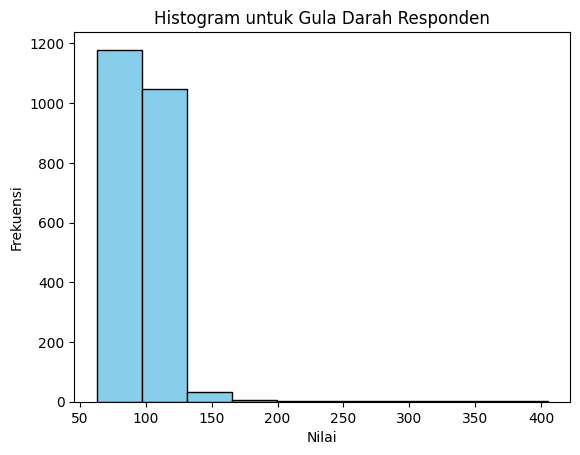

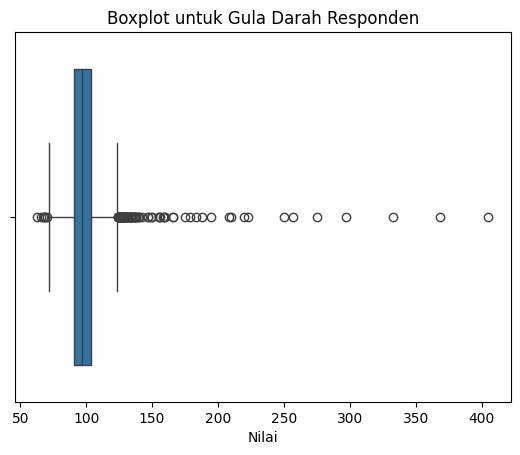

'\nAnalisis Plot:\nPada plot di bawah dapat dilihat bahwa ternyata terdapat pencilan (outlier) pada\npersebaran data LBXGLU, dan jumlahnya cukup sedikit apabila dibandingkan dengan\ntotal data keseluruhan\n'

In [ ]:
'''
Menampilkan histogram dan boxplot pada kolom LBXGLU untuk mengetahui distribusi
data LBXGLU
'''

#Proses pembuatan plot histogram
plt.hist(df['LBXGLU'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram untuk Gula Darah Responden')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

#Proses pembuatan boxplot
sns.boxplot(x=df['LBXGLU'])
plt.title('Boxplot untuk Gula Darah Responden')
plt.xlabel('Nilai')
plt.show()

'''
Analisis Plot:
Pada plot di bawah dapat dilihat bahwa ternyata terdapat pencilan (outlier) pada
persebaran data LBXGLU, dan jumlahnya cukup sedikit apabila dibandingkan dengan
total data keseluruhan
'''



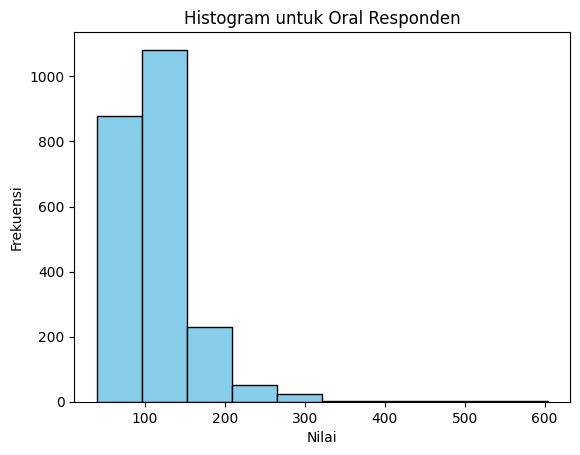

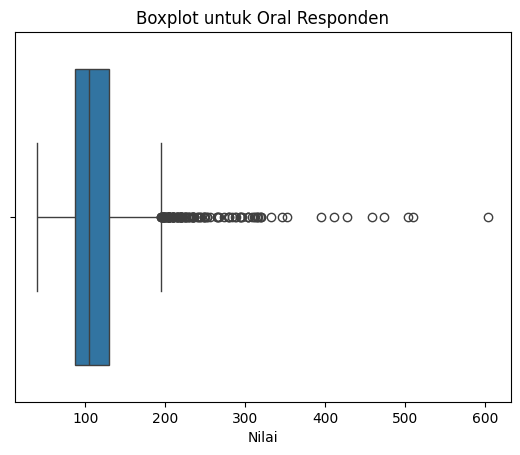

'\nAnalisis Plot:\nPada plot di bawah dapat dilihat bahwa ternyata terdapat pencilan (outlier) pada\npersebaran data LBXGLT, dan jumlahnya cukup sedikit apabila dibandingkan dengan\ntotal data keseluruhan\n'

In [ ]:
'''
Menampilkan histogram dan boxplot pada kolom LBXGLT untuk mengetahui distribusi
data LBXGLT
'''

#Proses pembuatan plot histogram
plt.hist(df['LBXGLT'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram untuk Oral Responden')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

#Proses pembuatan boxplot
sns.boxplot(x=df['LBXGLT'])
plt.title('Boxplot untuk Oral Responden')
plt.xlabel('Nilai')
plt.show()

'''
Analisis Plot:
Pada plot di bawah dapat dilihat bahwa ternyata terdapat pencilan (outlier) pada
persebaran data LBXGLT, dan jumlahnya cukup sedikit apabila dibandingkan dengan
total data keseluruhan
'''



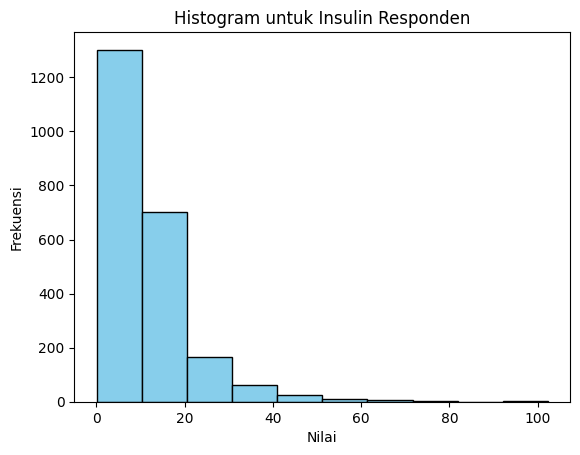

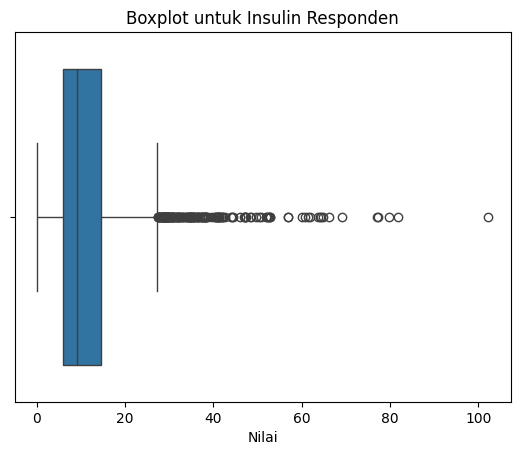

'\nAnalisis Plot:\nPada plot di bawah dapat dilihat bahwa ternyata terdapat pencilan (outlier) pada\npersebaran data LBXIN, dan jumlahnya cukup sedikit apabila dibandingkan dengan\ntotal data keseluruhan\n'

In [ ]:
'''
Menampilkan histogram dan boxplot pada kolom LBXIN untuk mengetahui distribusi
data LBXIN
'''

#Proses pembuatan plot histogram
plt.hist(df['LBXIN'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram untuk Insulin Responden')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

#Proses pembuatan boxplot
sns.boxplot(x=df['LBXIN'])
plt.title('Boxplot untuk Insulin Responden')
plt.xlabel('Nilai')
plt.show()

'''
Analisis Plot:
Pada plot di bawah dapat dilihat bahwa ternyata terdapat pencilan (outlier) pada
persebaran data LBXIN, dan jumlahnya cukup sedikit apabila dibandingkan dengan
total data keseluruhan
'''



#####DATA PREPROCESSING
Pada tahap ini dilakukan proses *data preprocessing*. Terdapat beberapa tahapan untuk melakukan *Data preprocessing*, yakni memeriksa setiap kolom, dan mengidentifikasi apakah data yang akan diolah sudah siap atau belum. Adapun pengecekan dilakukan antara lain:
*   **Pengecekan Missing Value :**
Masalah *missing value* muncul karena adanya nilai yang hilang dari sebuah data dan biasanya direpresentasikan dengan nilai NaN
*   **Pengecekan Invalid Value :**
Masalah *invalid value* muncul karena adanya nilai yang tidak sesuai dengan *background knowledge* dari data tersebut. Sebagai contoh, untuk data kategorikal yang hanya 2, namun ada nilai yang tidak valid.
*   **Pengecekan Duplicate Data :**
Masalah *duplicate data* muncul karena semua nilai dalam satu unit baris memiliki nilai yang sama persis pada setiap kolomnya
*   **Pengecekan Outlier :**
Masalah *outlier* muncul karena terdapat nilai pada suatu kolom yang berada sangat jauh dari titik data yang lain dalam sebuah dataset.







######INFORMASI STATISTIK DATASET
Menampilkan informasi statistik masing-masing kolom pada dataset, berupa jumlah baris, rata-rata, simpangan baku, dan lain-lain.



In [ ]:
'''
Menampilkan informasi statistik umum masing-masing kolom pada dataset
'''
df.describe()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,0.159789,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,0.366491,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,0.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,0.000000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,0.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,0.000000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,1.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [ ]:
'''
Menampilkan tipe data dan jumlah pada masing-masing
kolom pada dataset
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   int64  
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 178.1 KB


In [ ]:
#Menampilkan data teratas
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [ ]:
#Menampilkan data terbawah
df.tail()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
2273,83711.0,0,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,0,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,0,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,0,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99
2277,83727.0,0,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76


######DROP KOLOM
Drop kolom dilakukan untuk mengurangi dimensi data sehingga kompleksitas berkurang. Kolom yang dilakukan drop biasanya kolom yang tidak relevan dengan masalah yang sedang dianalisis.




In [ ]:
'''
Melakukan drop pada kolom SEQN atau sequence number, hal ini dikarenakan
kolom SEQN tidak diperlukan untuk proses pembuatan model, dan dapat membantu
mengurangi dimensi pada data
'''
df = df.drop('SEQN',axis=1)
df

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...
2273,0,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,0,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,0,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,0,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


In [ ]:
'''
Menampilkan nilai pada masing-masing kolom, kemudian melakukan pengecekan
nilai unik pada masing-masing kolom yang merupakan data kategorikal
'''
#menampilkan data kategorik pada kolom age_group
#Didapat bahwa age_group memiliki 2 kategori, yakni adult dan senior
print(df['age_group'].unique())

#Menampilkan data kategorik pada kolom RIAGENDR
#Didapat bahwa nilai gender ada 2 dan 1. Di mana 2 adalah perempuan dan 1 adalah laki-laki
print(df['RIAGENDR'].unique())

#Menampilkan data kategorik pada kolom PAQ605
#Didapat bahwa nilai PAQ605 ada 2 dan 1. Di mana 2 adalah tidak aktif melakukan aktivitas fisik
#dan 1 adalah aktif melakuakn aktivitas fisik
#Terdapat nilai 7 pada PAQ605, yang mana nilai 7 ini tidak diketahui (invalid)
print(df['PAQ605'].unique())

#Menampilkan data kategorikal DIQ010,
#yang mana terdapat 3 kategori
#Nilai 1 berarti memiliki diabetes
#Nilai 2 berarti tidak memiliki diabetes
#Nilai 3 berarti berada di borderline (prediabetes)
print(df['DIQ010'].unique())

[0 1]
[2. 1.]
[2. 1. 7.]
[2. 1. 3.]


In [ ]:
'''
Mengubah data kategorik pada kolom RIAGENDR yang awalnya bernilai
2 dan 1,  menjadi 0 dan 1 (0 untuk male,1 untuk female)
'''
df['RIAGENDR'] = df['RIAGENDR'].map({1: 0, 2: 1})

#Tampilkan data yang sudah diproses
df.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,0,61.0,1,2.0,35.7,110.0,2.0,150.0,14.91
1,0,26.0,1,2.0,20.3,89.0,2.0,80.0,3.85
2,0,16.0,0,2.0,23.2,89.0,2.0,68.0,6.14
3,0,32.0,0,2.0,28.9,104.0,2.0,84.0,16.15
4,0,38.0,1,1.0,35.9,103.0,2.0,81.0,10.92


######PENGUBAHAN KELAS PADA DATA KATEGORIKAL


In [ ]:
'''
Mengubah data kategorik pada kolom PAQ605 yang awalnya bernilai
2 dan 1,  menjadi 0 dan 1 (1 tidak melakukan aktivitas fisik,0 untuk aktif melakukan
aktivitas fisik)
'''
df['PAQ605'] = df['PAQ605'].map({1: 0, 2: 1})

#Tampilkan data yang sudah diproses
df.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,0,61.0,1,1.0,35.7,110.0,2.0,150.0,14.91
1,0,26.0,1,1.0,20.3,89.0,2.0,80.0,3.85
2,0,16.0,0,1.0,23.2,89.0,2.0,68.0,6.14
3,0,32.0,0,1.0,28.9,104.0,2.0,84.0,16.15
4,0,38.0,1,0.0,35.9,103.0,2.0,81.0,10.92


######PENGECEKAN NILAI NULL PADA SETIAP KOLOM
Pada proses ini akan dilakukan pengecekan nilai null (*missing value*) pada masing-masing kolom. Apabila terdapat baris yang memiliki nilai NaN pada kolom tertentu, maka baris tersebut akan diberi nilai.

In [ ]:
'''
Melakukan pengecekan nilai missing value pada dataset
(Didapat bahwa pada kolom PAQ605 terdapat 1 missing value setelah
dilakukan perubahan pada kategorisasi)
'''
df.isnull().sum()


age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       1
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

In [ ]:
'''
Melakukan pengecekan terhadap kolom PAQ605 yang ada 1 kolom missing value
'''
df[df.PAQ605.isna()]

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
413,0,51.0,0,NaN,21.1,110.0,2.0,66.0,4.24


In [ ]:
'''
Menggunakan metode imputation, yakni menggunakan nilai tertentu untuk
mengganti missing value. Karena kolom PAQ605 merupakan kolom kategorikal,
maka digunakan nilai dominan sebagai pengganti missing value tersebut.
'''
df['PAQ605'].value_counts()

PAQ605
1.0    1868
0.0     409
Name: count, dtype: int64

In [ ]:
'''
Berdasarkan perhitungan di atas, didapat bahwa nilai PAQ605 paling dominan
adalah 0 (yang berarti tidak melakukan aktivitas fisik), maka
nilai NULL pada kolom PAQ605 kita assign sebagai 0
'''
df['PAQ605'].fillna(value = 0,inplace = True)
#Sekarang nilai null (missing value) sudah tidak ada
df.isnull().sum()

age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

######PENGECEKAN DUPLIKASI DATA PADA SETIAP KOLOM
Pengecekan duplikasi pada setiap kolom dilakukan untuk memastikan bahwa tidak ada baris yang berulang yang nantinya akan mengacaukan analisis dan pelatihan model.




In [ ]:
'''
Melakukan pengecekan nilai yang duplikat pada dataset
(Didapat bahwa setiap kolom pada dataset tidak memiliki nilai duplikat)
'''
df.duplicated().sum()

0

######PENGECEKAN OUTLIER (PENCILAN) PADA SETIAP KOLOM
*Outlier* adalah nilai yang jauh berbeda dari mayoritas data dalam sebuah kolom. Nilai *outlier* ini dapat mempengaruhi hasil analisis statistik pada model. Nantinya nilai *outlier* akan di-*assign* dengan nilai batas atas ataupun batas bawah.


In [ ]:
'''
Melakukan pengecekan outlier (pencilan) pada data RIDAGEYR
Metode yang digunakan dalam mengecek  outlier adalah IQR method.
(Didapat bahwa setiap data pada kolom RIDAGEYR tidak memiliki pencilan)
'''
usia = df['RIDAGEYR']
q25, q75 = np.percentile(usia, 25), np.percentile(usia, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

usia_lower_than = usia < minimum
usia_more_than = usia > maximum
print(usia_lower_than.sum(),usia_more_than.sum())

0 0


In [ ]:
'''
Melakukan pengecekan outlier (pencilan) pada data BMXBMI
Metode yang digunakan dalam mengecek  outlier adalah IQR method.
(Didapat bahwa data pada kolom BMXBMI memiliki pencilan sebanyak 88)
'''
BMXBMI = df['BMXBMI']
q25, q75 = np.percentile(BMXBMI, 25), np.percentile(BMXBMI, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
BMI_lower_than = BMXBMI < minimum
BMI_more_than = BMXBMI > maximum
print(BMI_lower_than.sum(),BMI_more_than.sum())

0 88


In [ ]:
'''
Melakukan penanganan outlier pada kolom BMI dengan imputation, yakni mengganti
outlier dengan nilai tertentu. Nilai yang digunakan adalah batas atas
Sekarang nilai outlier sudah 0
'''
df.loc[df['BMXBMI'] > maximum, 'BMXBMI'] = maximum
BMI_lower_than = BMXBMI < minimum
BMI_more_than = BMXBMI > maximum
print(BMI_lower_than.sum(),BMI_more_than.sum())

0 0


In [ ]:
'''
Melakukan pengecekan outlier (pencilan) pada data LBXGLU
Metode yang digunakan dalam mengecek  outlier adalah IQR method.
(Didapat bahwa  data pada kolom LBXGLU memiliki pencilan sebanyak 104)
'''
glukosa = df['LBXGLU']
q25, q75 = np.percentile(glukosa, 25), np.percentile(glukosa, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
glukosa_lower_than = glukosa < minimum
glukosa_more_than = glukosa > maximum
print(glukosa_lower_than.sum(),glukosa_more_than.sum())

7 97


In [ ]:
'''
Melakukan penanganan outlier pada kolom LBXGLU dengan imputation, yakni mengganti
outlier dengan nilai tertentu. Nilai yang digunakan adalah batas atas atau
batas bawah
Sekarang nilai outlier sudah 0
'''
df.loc[df['LBXGLU'] > maximum, 'LBXGLU'] = maximum
df.loc[df['LBXGLU'] < minimum, 'LBXGLU'] = minimum
glukosa_lower_than = glukosa < minimum
glukosa_more_than = glukosa > maximum
print(glukosa_lower_than.sum(),glukosa_more_than.sum())

0 0


In [ ]:
'''
Melakukan pengecekan outlier (pencilan) pada data LBXGLT
Metode yang digunakan dalam mengecek  outlier adalah IQR method.
(Didapat bahwa pada kolom LBXGLT terdapat pencilan sebanyak 121)
'''
oral = df['LBXGLT']
q25, q75 = np.percentile(oral, 25), np.percentile(oral, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
oral_lower_than = oral < minimum
oral_more_than = oral > maximum
print(oral_lower_than.sum(),oral_more_than.sum())

0 121


In [ ]:
'''
Melakukan penanganan outlier pada kolom LBXGLT dengan imputation, yakni mengganti
outlier dengan nilai tertentu. Nilai yang digunakan adalah batas atas
Sekarang nilai outlier sudah 0
'''
df.loc[df['LBXGLT'] > maximum, 'LBXGLT'] = maximum
oral_lower_than = oral < minimum
oral_more_than = oral > maximum
print(oral_lower_than.sum(),oral_more_than.sum())

0 0


In [ ]:
'''
Melakukan pengecekan outlier (pencilan) pada data LBXIN
Metode yang digunakan dalam mengecek  outlier adalah IQR method.
(Didapat bahwa setiap data pada kolom LBXIN memiliki pencilan)
'''
insulin = df['LBXIN']
q25, q75 = np.percentile(insulin, 25), np.percentile(insulin, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
insulin_lower_than = insulin < minimum
insulin_more_than = insulin > maximum
print(insulin_lower_than.sum(),insulin_more_than.sum())

0 150


In [ ]:
'''
Melakukan penanganan outlier pada kolom LBXIN dengan imputation, yakni mengganti
outlier dengan nilai tertentu. Nilai yang digunakan adalah batas atas
Sekarang nilai outlier sudah 0
'''
df.loc[df['LBXIN'] > maximum, 'LBXIN'] = maximum
insulin_lower_than = insulin < minimum
insulin_more_than = insulin > maximum
print(insulin_lower_than.sum(),insulin_more_than.sum())

0 0


#####DATA VISUALIZATION (After Preprocessing)
Tahapan visualisasi data ini akan digunakan sebagai tahapan dalam proses analisis data. Pada tahap ini, akan dilakukan proses menampilkan visual dari suatu kolom setelah dilakukan preprocessing, untuk membantu dalam melihat
perbandingan dengan data sebelum preprocessing.

In [ ]:
'''
Menampilkan informasi statistik umum pada masing-masing kolom pasca preprocessing
untuk menganalisis perubahan apa saja yang terjadi pada dataset setelah
dilakukan preprocessing
'''
df.describe()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,0.159789,41.795874,0.511414,0.820018,27.719930,98.319579,2.016242,111.785119,11.023266
std,0.366491,20.156111,0.499979,0.384257,6.516548,10.434928,0.185556,35.051922,6.913916
min,0.000000,12.000000,0.000000,0.000000,14.500000,71.500000,1.000000,40.000000,0.140000
25%,0.000000,24.000000,0.000000,1.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,0.000000,41.000000,1.000000,1.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,0.000000,58.000000,1.000000,1.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,1.000000,80.000000,1.000000,1.000000,43.800000,123.500000,3.000000,194.500000,27.310000


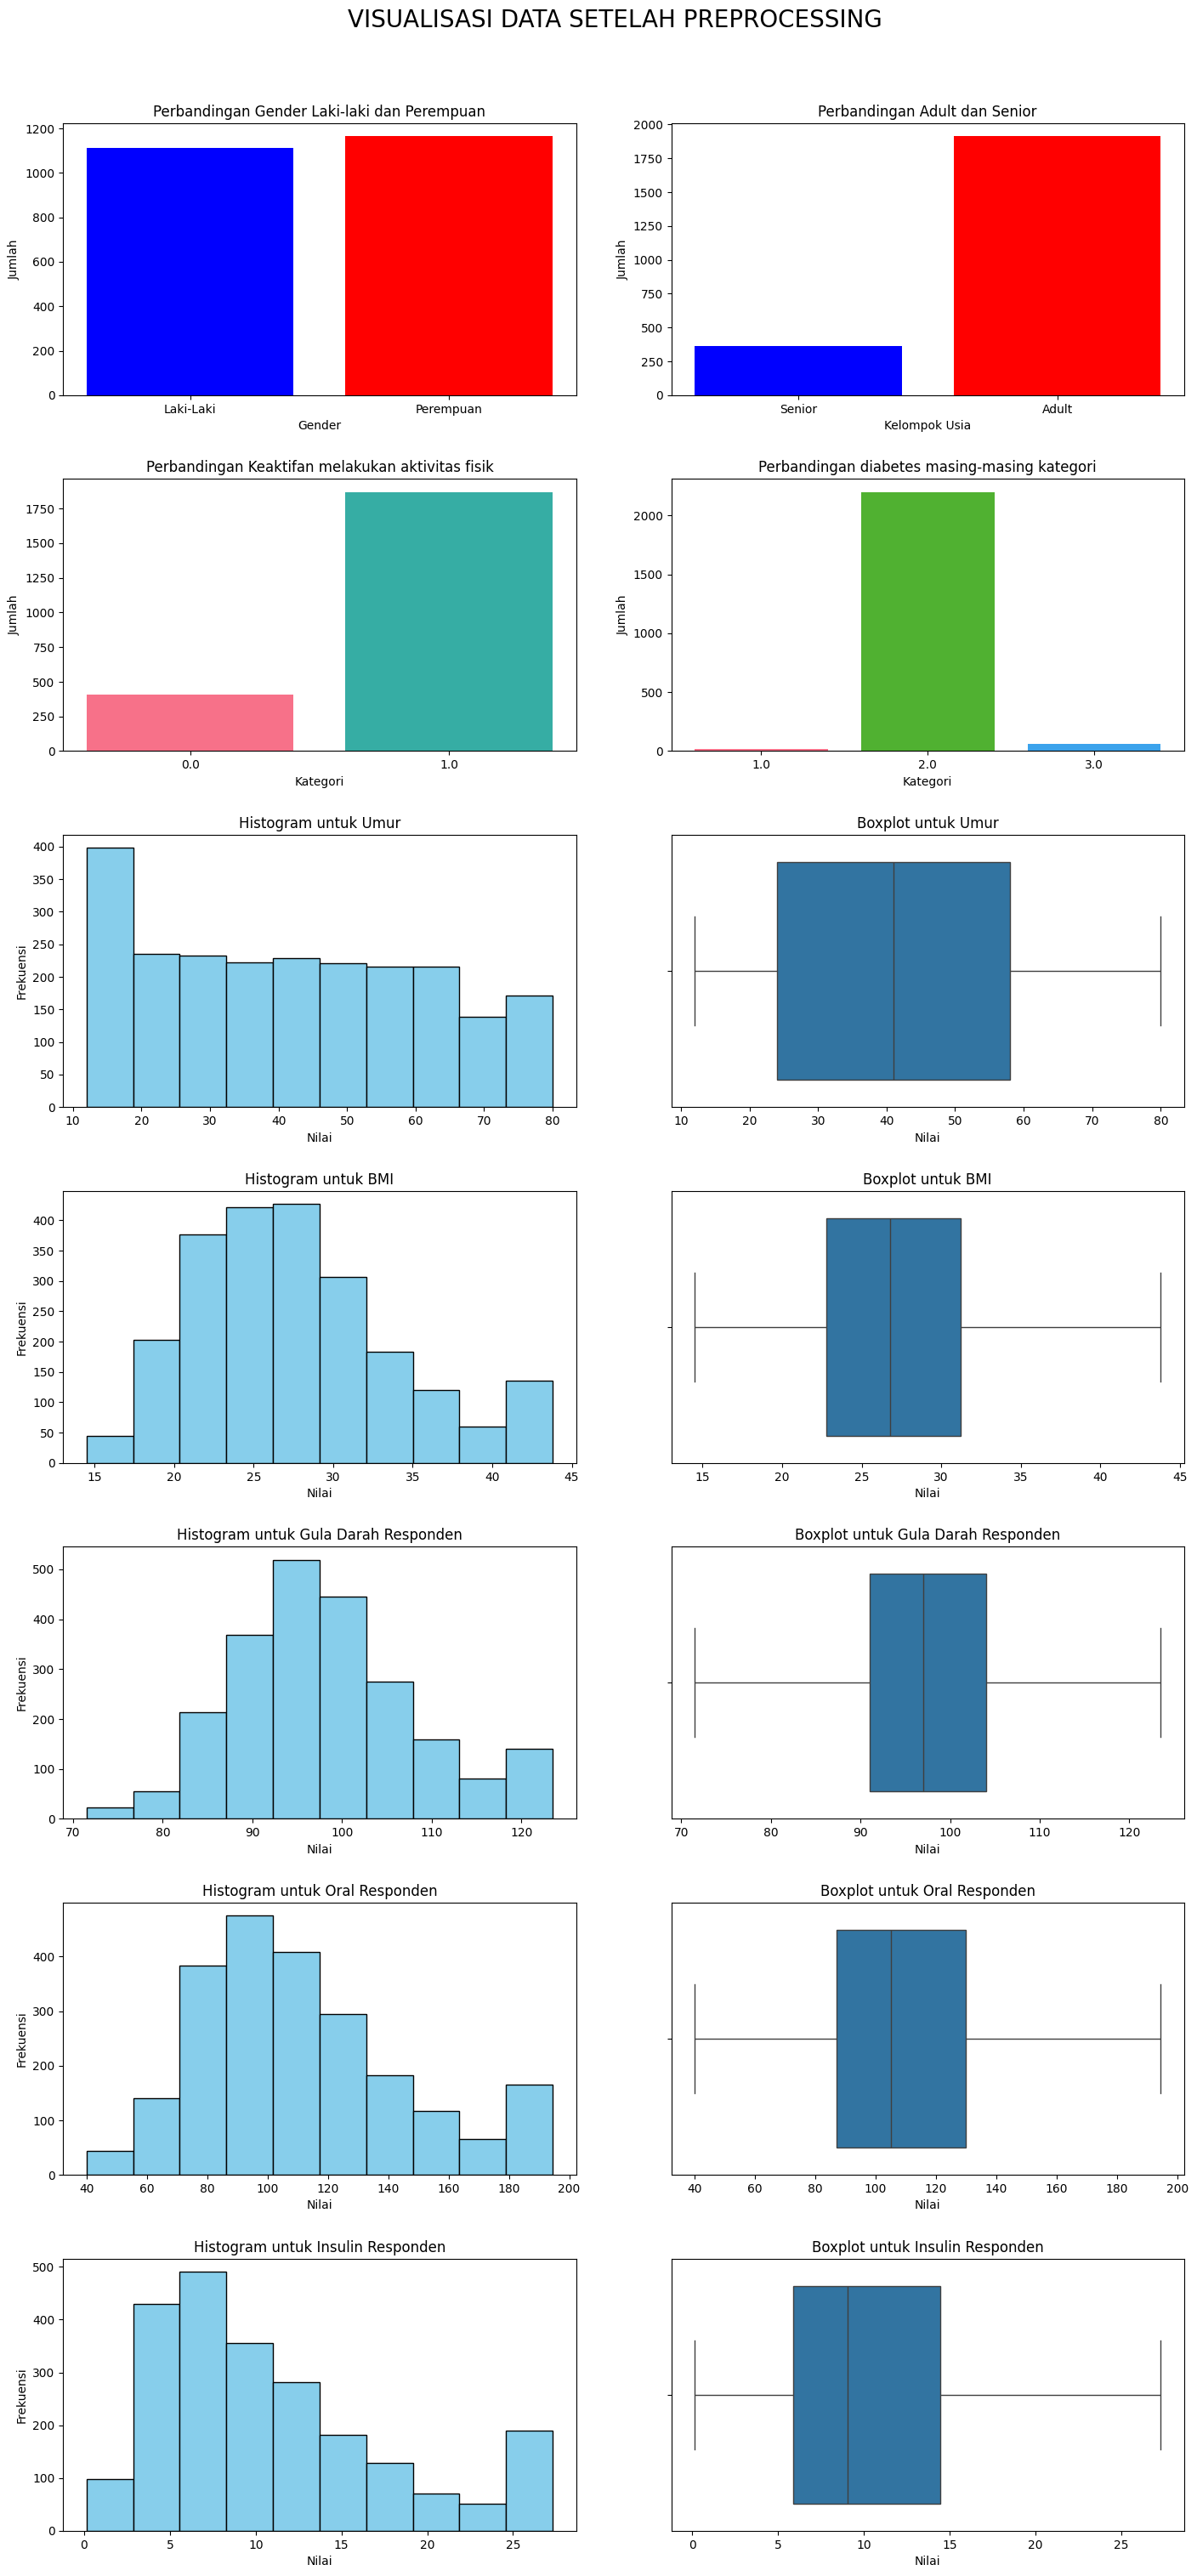

In [ ]:
'''
Menampilkan plot-plot setelah melakukan preprocessing, dan dapat dilihat secara
visual perubahan yang terjadi pada plotnya (seperti menghilangkan kategori yang
tidak valid hingga mengganti nilai outlier dengan batas atas atau batas bawah)
'''
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 30))
fig.tight_layout(pad=5.0)
fig.suptitle('VISUALISASI DATA SETELAH PREPROCESSING', fontsize=20, y=1.02)

# Plot 1: Diagram Batang Perbandingan Gender
jumlahGender = df['RIAGENDR'].value_counts()
label = ['Laki-Laki', 'Perempuan']
nilai = [jumlahGender[0], jumlahGender[1]]
axes[0, 0].bar(label, nilai, color=['blue', 'red'])
axes[0, 0].set_title('Perbandingan Gender Laki-laki dan Perempuan')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Jumlah')

# Plot 2: Diagram Batang Perbandingan Age Group
jumlahAgeGroup = df['age_group'].value_counts()
label = ['Senior', 'Adult']
nilai = [jumlahAgeGroup[1], jumlahAgeGroup[0]]
axes[0, 1].bar(label, nilai, color=['blue', 'red'])
axes[0, 1].set_title('Perbandingan Adult dan Senior')
axes[0, 1].set_xlabel('Kelompok Usia')
axes[0, 1].set_ylabel('Jumlah')

# Plot 3: Diagram Batang Perbandingan PAQ605
jumlahPAQ605 = df['PAQ605'].value_counts().sort_index()
jumlahPAQ605.index = jumlahPAQ605.index.map(str)
palette = sns.color_palette("husl", len(jumlahPAQ605))
axes[1, 0].bar(jumlahPAQ605.index, jumlahPAQ605.values, color=palette)
axes[1, 0].set_title('Perbandingan Keaktifan melakukan aktivitas fisik')
axes[1, 0].set_xlabel('Kategori')
axes[1, 0].set_ylabel('Jumlah')

# Plot 4: Diagram Batang Perbandingan DIQ010
jumlahDIQ010 = df['DIQ010'].value_counts().sort_index()
jumlahDIQ010.index = jumlahDIQ010.index.map(str)
palette = sns.color_palette("husl", len(jumlahDIQ010))
axes[1, 1].bar(jumlahDIQ010.index, jumlahDIQ010.values, color=palette)
axes[1, 1].set_title('Perbandingan diabetes masing-masing kategori')
axes[1, 1].set_xlabel('Kategori')
axes[1, 1].set_ylabel('Jumlah')

# Plot 5: Histogram untuk Umur
axes[2, 0].hist(df['RIDAGEYR'], bins=10, color='skyblue', edgecolor='black')
axes[2, 0].set_title('Histogram untuk Umur')
axes[2, 0].set_xlabel('Nilai')
axes[2, 0].set_ylabel('Frekuensi')

# Plot 6: Boxplot untuk Umur
sns.boxplot(ax=axes[2, 1], x=df['RIDAGEYR'])
axes[2, 1].set_title('Boxplot untuk Umur')
axes[2, 1].set_xlabel('Nilai')

# Plot 7: Histogram untuk BMI
axes[3, 0].hist(df['BMXBMI'], bins=10, color='skyblue', edgecolor='black')
axes[3, 0].set_title('Histogram untuk BMI')
axes[3, 0].set_xlabel('Nilai')
axes[3, 0].set_ylabel('Frekuensi')

# Plot 8: Boxplot untuk BMI
sns.boxplot(ax=axes[3, 1], x=df['BMXBMI'])
axes[3, 1].set_title('Boxplot untuk BMI')
axes[3, 1].set_xlabel('Nilai')

# Plot 9: Histogram untuk Gula Darah Responden
axes[4, 0].hist(df['LBXGLU'], bins=10, color='skyblue', edgecolor='black')
axes[4, 0].set_title('Histogram untuk Gula Darah Responden')
axes[4, 0].set_xlabel('Nilai')
axes[4, 0].set_ylabel('Frekuensi')

# Plot 10: Boxplot untuk Gula Darah Responden
sns.boxplot(ax=axes[4, 1], x=df['LBXGLU'])
axes[4, 1].set_title('Boxplot untuk Gula Darah Responden')
axes[4, 1].set_xlabel('Nilai')

# Plot 11: Histogram untuk Oral Responden
axes[5, 0].hist(df['LBXGLT'], bins=10, color='skyblue', edgecolor='black')
axes[5, 0].set_title('Histogram untuk Oral Responden')
axes[5, 0].set_xlabel('Nilai')
axes[5, 0].set_ylabel('Frekuensi')

# Plot 12: Boxplot untuk Oral Responden
sns.boxplot(ax=axes[5, 1], x=df['LBXGLT'])
axes[5, 1].set_title('Boxplot untuk Oral Responden')
axes[5, 1].set_xlabel('Nilai')

# Plot 13: Histogram untuk Insulin Responden
axes[6, 0].hist(df['LBXIN'], bins=10, color='skyblue', edgecolor='black')
axes[6, 0].set_title('Histogram untuk Insulin Responden')
axes[6, 0].set_xlabel('Nilai')
axes[6, 0].set_ylabel('Frekuensi')

# Plot 14: Boxplot untuk Insulin Responden
sns.boxplot(ax=axes[6, 1], x=df['LBXIN'])
axes[6, 1].set_title('Boxplot untuk Insulin Responden')
axes[6, 1].set_xlabel('Nilai')

plt.show()


In [ ]:
# Show your data in tabular or other visualization ways
# Data Preprocessing
# Data Splitting
# Write your code here

#### METODE KNN
Metode pertama yang digunakan yakni metode k-Nearest Neighbor. Adapun setting parameter yang digunakan adalah:
*   Jumlah k untuk Nearest Neighbor adalah 3, 5,7,9,11 (nantinya akan dipilih sebagai best hyperparameter)
*   Metric jarak yang digunakan untuk menghitung jarak antar data adalah jarak absolut atau manhattan distance (d = |a-b|)
*   Membagi data train menjadi 5 buah fold untuk k-Fold cross validation





#####DATA SPLITTING
Pada tahap ini  akan dilakukan data splitting, untuk metode KNN, data splitting dilakukan dengan membagi dataset menjadi beberapa fold (dalam hal ini 5 fold). Sebelum dibagi ke beberapa fold, dataset akan dishuffle terlebih dahulu. Pada tahap ini kita akan menggunakan K-fold cross validation, adapun tahapannya terlampir pada gambar berikut:
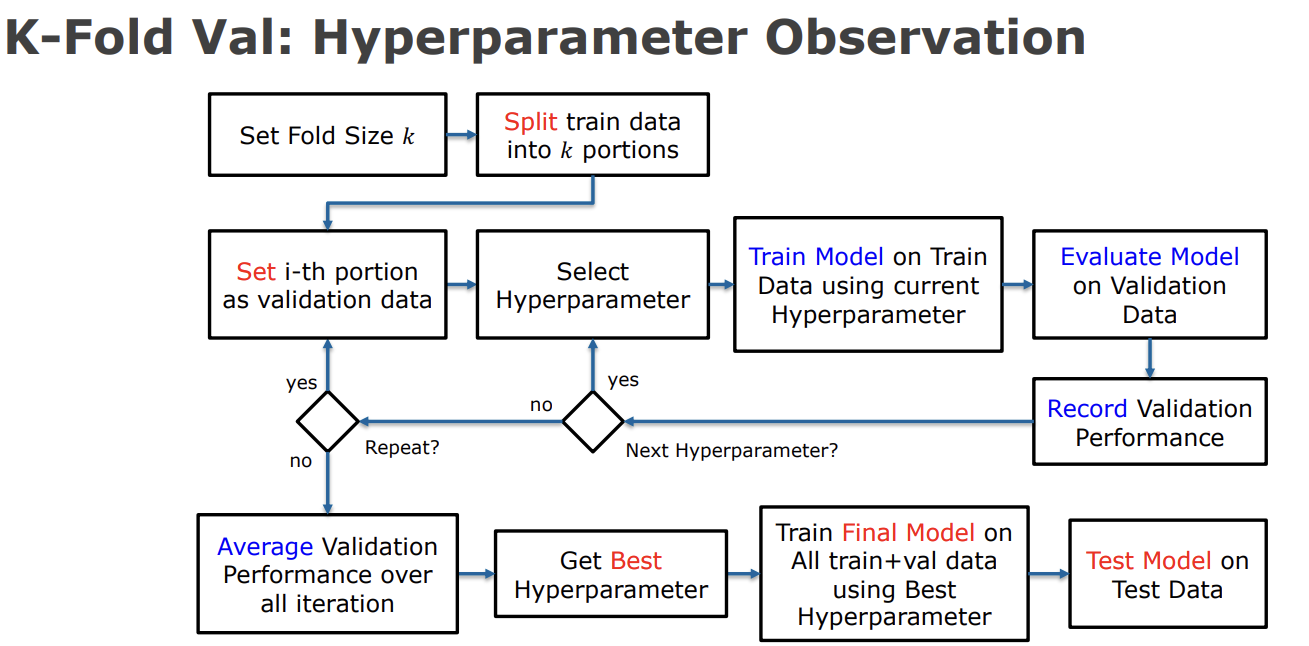


In [ ]:
'''
Berikut adalah proses shuffle pada dataset, kemudian setelah dishuffle, dilakukan
reset index. Hal ini dilakukan agar suatu data tidak menumpuk pada kategori tertentu,
sehingga terdistribusi secara merata dan model yang dihasilkan cenderung lebih baik
'''
df = df.sample(2278).reset_index(drop=True)
df

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,0,13.0,0,0.0,25.3,98.0,2.0,124.0,4.17
1,0,16.0,1,1.0,19.5,86.0,2.0,76.0,4.26
2,0,32.0,0,1.0,30.3,105.0,2.0,111.0,6.37
3,0,14.0,0,1.0,17.6,80.0,2.0,148.0,3.09
4,0,25.0,0,1.0,21.6,98.0,2.0,68.0,2.97
...,...,...,...,...,...,...,...,...,...
2273,0,27.0,1,1.0,30.0,94.0,2.0,91.0,7.57
2274,0,47.0,1,1.0,27.3,88.0,2.0,117.0,7.90
2275,0,27.0,1,1.0,24.6,89.0,2.0,94.0,5.91
2276,0,30.0,1,1.0,33.1,95.0,2.0,62.0,10.15


In [ ]:
#Membuat dataframe baru df_norm untuk kemudian dilakukan normalisasi
df_norm = df.copy()
df_norm

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,0,13.0,0,0.0,25.3,98.0,2.0,124.0,4.17
1,0,16.0,1,1.0,19.5,86.0,2.0,76.0,4.26
2,0,32.0,0,1.0,30.3,105.0,2.0,111.0,6.37
3,0,14.0,0,1.0,17.6,80.0,2.0,148.0,3.09
4,0,25.0,0,1.0,21.6,98.0,2.0,68.0,2.97
...,...,...,...,...,...,...,...,...,...
2273,0,27.0,1,1.0,30.0,94.0,2.0,91.0,7.57
2274,0,47.0,1,1.0,27.3,88.0,2.0,117.0,7.90
2275,0,27.0,1,1.0,24.6,89.0,2.0,94.0,5.91
2276,0,30.0,1,1.0,33.1,95.0,2.0,62.0,10.15


In [ ]:
'''
Melakukan normalisasi pada data (rentang data akan menjadi 0 sampai 1 saja, untuk
data numerik).
'''
def normalize(x):
  return (x - x.min())/(x.max()-x.min())

df_norm['BMXBMI'] = normalize(df_norm['BMXBMI'])
df_norm['RIDAGEYR'] = normalize(df_norm['RIDAGEYR'])
df_norm['LBXGLU'] = normalize(df_norm['LBXGLU'])
df_norm['LBXGLT'] = normalize(df_norm['LBXGLT'])
df_norm['LBXIN'] = normalize(df_norm['LBXIN'])
df_norm

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,0,0.014706,0,0.0,0.368601,0.509615,2.0,0.543689,0.148325
1,0,0.058824,1,1.0,0.170648,0.278846,2.0,0.233010,0.151638
2,0,0.294118,0,1.0,0.539249,0.644231,2.0,0.459547,0.229297
3,0,0.029412,0,1.0,0.105802,0.163462,2.0,0.699029,0.108576
4,0,0.191176,0,1.0,0.242321,0.509615,2.0,0.181230,0.104159
...,...,...,...,...,...,...,...,...,...
2273,0,0.220588,1,1.0,0.529010,0.432692,2.0,0.330097,0.273463
2274,0,0.514706,1,1.0,0.436860,0.317308,2.0,0.498382,0.285609
2275,0,0.220588,1,1.0,0.344710,0.336538,2.0,0.349515,0.212367
2276,0,0.264706,1,1.0,0.634812,0.451923,2.0,0.142395,0.368421


In [ ]:
'''
Membagi antara data train dengan data test pada df yang sudah dirandom sebelumnya.
Adapun proporsinya yaitu data train sebanyak 80% dan data test sebanyak 20%
'''
train_ukuran = int(0.8 * len(df_norm))
data_train = df_norm[:train_ukuran] #80% dari df_norm dijadikan data train
data_test = df_norm[train_ukuran:] #sisanya dijadikan data test


In [ ]:
'''
Membagi data train (80% data keseluruhan) menjadi  5 buah fold, yang nantinya
akan dilakukan k-fold cross validation
'''
jumlah_fold=5
fold1 = df_norm[0:364]
fold2 = df_norm[365:728]
fold3 = df_norm[729:1092]
fold4 = df_norm[1093:1456]
fold5 = df_norm[1457:1822]
fold = [fold1,fold2,fold3,fold4,fold5]

In [ ]:
'''
Menentukan x dan y pada dataset, dalam hal ini
y adalah yang diklasifikasi (yaitu age_group), dan X adalah sisanya
'''
X = df_norm.drop('age_group',axis=1)
y = df_norm.age_group
y

0       0
1       0
2       0
3       0
4       0
       ..
2273    0
2274    0
2275    0
2276    0
2277    0
Name: age_group, Length: 2278, dtype: int64

#####EXPERIMENT
Pada tahap ini  akan dilakukan proses eksperimen, yang mana akan melakukan proses predict dengan menerapkan metode K-Nearest Neighbor. Yang mana dilakukan
untuk mengklasifikasi kelompok umur berdasarkan data yang ada. Metode perhitungan jarak yang digunakan adalah menggunakan manhattan.

In [ ]:
'''
Fungsi manhattan akan mengembalikan jarak berupa
harga mutlak dari pengurangan a dan b
manhattan = |a-b|
'''
def manhattan (a,b):
  return np.abs(a-b).sum() #abs berarti absolute atau harga mutlak

In [ ]:
'''
Fungsi predict akan mencoba menghitung jarak pada masing-masing
antar data, kemudian dilakukan sorting dan y_pred akan menyimpan
jarak terdekat sebanyak k. Kemudian akan mengembalikan tetangga
terdekat terbanyak
'''
def predictkNN(x,k, X,y):
  distance = []
  for _, row in X.iterrows():
    distance.append(manhattan(x,row))
  data = X.copy()
  data['dist'] = distance
  data['kel_umur'] = y
  data = data.sort_values(by='dist').reset_index(drop=True)

  y_pred = data.iloc[:k].kel_umur.mode()
  return y_pred[0]

In [ ]:
'''
Melakukan uji coba model dengan K = 1, kemudian mengambil 5 data pertama
'''
# Predicting
X_test = df_norm.drop(columns=['age_group'])
y_test = df_norm['age_group']

# Menghitung ringkasan statistik untuk setiap kelas pada data latih

# Memprediksi kelas dari setiap baris data uji menggunakan fungsi predict dengan k = 1
predictions = [predictkNN(X_test.iloc[i], 1,X,y) for i in range(5)]

for i in range(5):
    print(f"Data ke-{i+1}: Prediksi = {predictions[i]}, Label = {y_test.iloc[i]}")

Data ke-1: Prediksi = 0, Label = 0
Data ke-2: Prediksi = 0, Label = 0
Data ke-3: Prediksi = 0, Label = 0
Data ke-4: Prediksi = 0, Label = 0
Data ke-5: Prediksi = 0, Label = 0


#####MODEL TRAINING AND TEST
Pada tahap ini dilakukan model training and test, dengan melakukan iterasi untuk berbagai nilai k dalam algoritma k-Nearest Neighbors (k-NN). Untuk setiap nilai k, dilakukan cross-validation dengan 3 lipatan (folds). Data pada setiap lipatan dibagi menjadi set train dan set validation. Kemudian, model k-NN digunakan untuk memprediksi kelas pada data pengujian berdasarkan data pelatihan. Akurasi prediksi dihitung untuk setiap lipatan dan rata-rata akurasi untuk setiap nilai k dihitung dan ditampilkan. Kemudian akan dilakukan perhitungan average validation performance untuk setiap iterasi guna mendapatkan best hyperparameter. Setelah didapat best hyperparameter, maka akan dilakukan test final model.


In [ ]:
'''
Fungsi akurasi digunakan untuk mengembalikan persentase akurasi pada model,
hal ini didapat dengan melakukan perbandingan antara jumlah prediksi benar
dengan keseluruhan data kemudian dikali 100%
'''
def akurasi(y_pred,y_true):
  n = len(y_pred)
  benar = 0
  for i in range(n):
    if y_pred[i] == y_true.iloc[i]:
      benar+=1 #apabila prediksi benar nilai variabel benar inkremen
  return (benar/n)*100

In [ ]:
'''
Akan dilakukan sebanyak 5 kali iterasi (dengan jumlah k = 3,5,7,9,11) untuk menguji
parameter k yang terbaik, kemudian pada masing-masing iterasi, dilakukan sebanyak
5 iterasi (sesuai jumlah fold) untuk dilakukan cross validation
'''
acc_k = []
for k in [3,5,7,9,11]:
  acc = []
  for i in range(jumlah_fold):
    validation = fold[i]
    train = pd.concat([fold[j] for j in range(jumlah_fold) if j!=i],axis=0)
    X_train, y_train = train.drop('age_group', axis=1), train.age_group
    X_validation, y_validation = validation.drop('age_group',axis=1),validation.age_group

    y_preds = []
    for _, x in X_validation.iterrows():
      y_preds.append(predictkNN(x,k,X_train,y_train))
    acc.append(akurasi(y_preds,y_validation))
  acc_k.append(sum(acc)/len(acc))
  print(f'Dengan k = {k}, didapat rata-rata akurasi = {sum(acc)/len(acc)}')

Dengan k = 3, didapat rata-rata akurasi = 95.65539027182862
Dengan k = 5, didapat rata-rata akurasi = 95.6562976251644
Dengan k = 7, didapat rata-rata akurasi = 96.20529988898606
Dengan k = 9, didapat rata-rata akurasi = 95.82053148180172
Dengan k = 11, didapat rata-rata akurasi = 95.92981862471277


The optimal number of K neighbors =  7


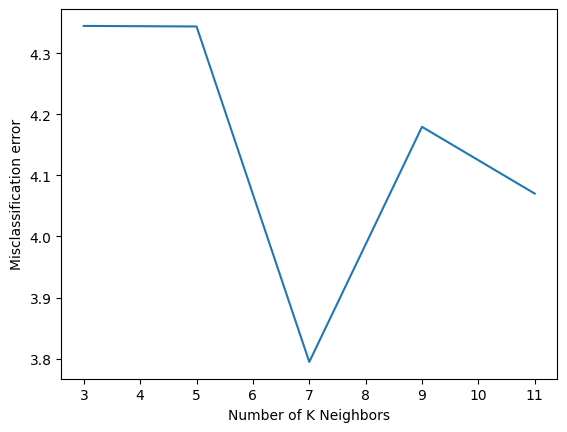

In [ ]:
'''
Menentukan best hyperparameter, setelah dilakukan proses evaluasi model pada data
validasi, dan dilakukan pada setiap hyperparameter k, maka dilakukan perhitungan
average validation performance yang terbaik.
'''
#Misclassification error versus k
MSE = [100-x for x in acc_k]

#Determining the best k value
k = [3,5,7,9,11]
optimal_k = k[MSE.index(min(MSE))]
print('The optimal number of K neighbors = ',optimal_k)

#plot misclassification error versus k
plt.plot(k,MSE)
plt.xlabel('Number of K Neighbors')
plt.ylabel('Misclassification error')
plt.show()

In [ ]:
'''
Setelah didapat best hyperparameter, maka kita lakukan train final model
pada setiap data train+valdiation menggunakan hyperparameter terbaik yang sudah
didapat sebelumnya, dan diuji ke data test.
'''
X_train, y_train = data_train.drop('age_group', axis=1), data_train.age_group
X_test, y_test = data_test.drop('age_group', axis=1), data_test.age_group
y_preds = []
for _, x in X_test.iterrows():
    y_preds.append(predictkNN(x, optimal_k, X_train, y_train))

test_accuracy = akurasi(y_preds, y_test)
print(f'Akurasi pada data testing dengan k terbaik = ({optimal_k}) = {test_accuracy}')


Akurasi pada data testing dengan k terbaik = (7) = 95.39473684210526


#####EVALUASI MODEL

Text(113.9222222222222, 0.5, 'Predicted Class')

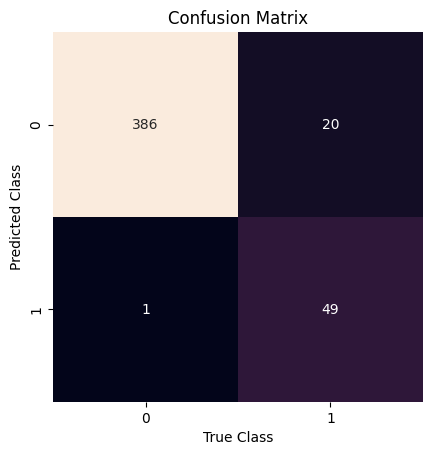

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test,y_preds)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report: \n\n")
print(classification_report(y_test,y_preds))

Classification Report: 


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       387
           1       0.98      0.71      0.82        69

    accuracy                           0.95       456
   macro avg       0.97      0.85      0.90       456
weighted avg       0.96      0.95      0.95       456



#### NAIVE BAYES
Pada model Naive Bayes bekerja dengan mengasumsikan bahwa fitur-fitur dalam dataset bersifat independen satu sama lain, meskipun dalam kenyataan seringkali tidak. Algoritma ini menghitung probabilitas setiap kelas berdasarkan data yang diberikan dan memilih kelas dengan probabilitas tertinggi sebagai hasil klasifikasi. Probabilitas dihitung menggunakan Teorema Bayes, dengan mengalikan probabilitas a priori dari kelas dengan likelihood fitur-fitur yang diamati. Dalam Naive Bayes kita akan menggunakan hyperparameter untuk _laplace smoothing_ untuk menghindari adanya peluang 0. Adapun nilai alpha yang dicoba adalah 0.1, 0.5, 1.0, 1.5, 2.0









#####DATA SPLITTING
Pada tahap ini  akan dilakukan data splitting, untuk metode Naive Bayes, data splitting dilakukan dengan membagi dataset menjadi beberapa fold (dalam hal ini 5 fold). Pada Naive Bayes, data akan displit antar kelas pada kolom target (age_group).Sebelum dibagi ke beberapa fold, dataset akan dishuffle terlebih dahulu. Pada tahap ini kita akan menggunakan K-fold cross validation yang mana tahapannya adalah sebagai berikut:


In [ ]:
df

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,0,13.0,0,0.0,25.3,98.0,2.0,124.0,4.17
1,0,16.0,1,1.0,19.5,86.0,2.0,76.0,4.26
2,0,32.0,0,1.0,30.3,105.0,2.0,111.0,6.37
3,0,14.0,0,1.0,17.6,80.0,2.0,148.0,3.09
4,0,25.0,0,1.0,21.6,98.0,2.0,68.0,2.97
...,...,...,...,...,...,...,...,...,...
2273,0,27.0,1,1.0,30.0,94.0,2.0,91.0,7.57
2274,0,47.0,1,1.0,27.3,88.0,2.0,117.0,7.90
2275,0,27.0,1,1.0,24.6,89.0,2.0,94.0,5.91
2276,0,30.0,1,1.0,33.1,95.0,2.0,62.0,10.15


In [ ]:
'''
Membagi antara data train dengan data test pada df yang sudah dirandom sebelumnya.
Adapun proporsinya yaitu data train sebanyak 80% dan data test sebanyak 20%
'''
train_ukuran = int(0.8 * len(df))
data_train = df[:train_ukuran] #80% dari df_norm dijadikan data train
data_test = df[train_ukuran:] #sisanya dijadikan data test


In [ ]:
'''
Membagi data train (80% data keseluruhan) menjadi  5 buah fold, yang nantinya
akan dilakukan k-fold cross validation
'''
jumlah_fold=5
fold1 = df[0:364]
fold2 = df[365:728]
fold3 = df[729:1092]
fold4 = df[1093:1456]
fold5 = df[1457:1822]
fold = [fold1,fold2,fold3,fold4,fold5]

In [ ]:
'''
Fungsi split by_class digunakan untuk membagi dataset berdasarkan kelas pada
kolom target (age_group). Fungsi ini mengelompokkan data ke dalam subset-subset
terpisah, masing-masing berisi data dari satu kelas tertentu (0 dan 1).
'''
def split_by_class(df):
    splitted_df = {}
    for kelas in df['age_group'].unique():
        splitted_df[kelas] = df[df['age_group'] == kelas].reset_index(drop=True)
    return splitted_df

splitted_data = split_by_class(df)

for kelas, data_kelas in splitted_data.items():
    print(f"Kelas: {kelas}")
    print(data_kelas.head())

Kelas: 0
   age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  \
0          0      13.0         0     0.0    25.3    98.0     2.0   124.0   
1          0      16.0         1     1.0    19.5    86.0     2.0    76.0   
2          0      32.0         0     1.0    30.3   105.0     2.0   111.0   
3          0      14.0         0     1.0    17.6    80.0     2.0   148.0   
4          0      25.0         0     1.0    21.6    98.0     2.0    68.0   

   LBXIN  
0   4.17  
1   4.26  
2   6.37  
3   3.09  
4   2.97  
Kelas: 1
   age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  \
0          1      80.0         1     1.0    28.0   123.5     2.0   184.0   
1          1      80.0         1     1.0    37.1   101.0     2.0   154.0   
2          1      69.0         0     1.0    19.3    96.0     2.0    80.0   
3          1      70.0         0     1.0    43.8   123.5     2.0   190.0   
4          1      80.0         0     0.0    22.5    99.0     2.0   194.5   

  

In [ ]:
'''
Fungsi summarize_dataset akan menampilkan informasi statistik dataset
berupa rata-rata, standar deviasi, dan jumlah baris. Yang nantinya
informasi statistik ini diperlukan untuk menghitung probabilitas pada
model Naive Bayes
'''
def summarize_dataset(df):
    summary = {}

    for column in df.columns:
        data = df[column].values
        mean_value = sum(data) / len(data)
        std_value = (sum((x - mean_value) ** 2 for x in data) / (len(data) - 1)) ** 0.5
        count_value = len(data)

        summary[column] = {
            'mean': mean_value,
            'std': std_value,
            'count': count_value
        }

    return summary

summarize_dataset(df)

{'age_group': {'mean': 0.15978928884986832,
  'std': 0.36649097411216885,
  'count': 2278},
 'RIDAGEYR': {'mean': 41.79587357330992,
  'std': 20.156110993185298,
  'count': 2278},
 'RIAGENDR': {'mean': 0.5114135206321334,
  'std': 0.49997946750268135,
  'count': 2278},
 'PAQ605': {'mean': 0.820017559262511,
  'std': 0.3842571781535255,
  'count': 2278},
 'BMXBMI': {'mean': 27.719929762949974,
  'std': 6.516548145418684,
  'count': 2278},
 'LBXGLU': {'mean': 98.31957857769973,
  'std': 10.434928062497265,
  'count': 2278},
 'DIQ010': {'mean': 2.0162423178226514,
  'std': 0.18555550403343185,
  'count': 2278},
 'LBXGLT': {'mean': 111.78511852502194,
  'std': 35.051922497330864,
  'count': 2278},
 'LBXIN': {'mean': 11.023266022827077,
  'std': 6.913916395307046,
  'count': 2278}}

In [ ]:
'''
Melakukan summarize_dataset pada masing-masing kelas kolom target
'''
def summarize_by_class(df):
    summaries = {}
    class_values = df['age_group'].unique()
    for class_value in class_values:
        class_data = df[df['age_group'] == class_value]
        summaries[class_value] = summarize_dataset(class_data.drop(columns=['age_group']))
        summaries[class_value]['count'] = len(class_data)
    return summaries

summarize_by_class(df)

{0: {'RIDAGEYR': {'mean': 35.78056426332289,
   'std': 15.856878125744627,
   'count': 1914},
  'RIAGENDR': {'mean': 0.5120167189132706,
   'std': 0.49998620758028506,
   'count': 1914},
  'PAQ605': {'mean': 0.803030303030303,
   'std': 0.3978131703134857,
   'count': 1914},
  'BMXBMI': {'mean': 27.69817136886104,
   'std': 6.709362722656052,
   'count': 1914},
  'LBXGLU': {'mean': 97.40595611285266,
   'std': 9.963539703282166,
   'count': 1914},
  'DIQ010': {'mean': 2.0141065830721003,
   'std': 0.1658495565529497,
   'count': 1914},
  'LBXGLT': {'mean': 107.37434691745037,
   'std': 32.576437359010974,
   'count': 1914},
  'LBXIN': {'mean': 11.212904911180814,
   'std': 7.028584697380087,
   'count': 1914},
  'count': 1914},
 1: {'RIDAGEYR': {'mean': 73.42582417582418,
   'std': 5.415770577139267,
   'count': 364},
  'RIAGENDR': {'mean': 0.5082417582417582,
   'std': 0.5006202068731164,
   'count': 364},
  'PAQ605': {'mean': 0.9093406593406593,
   'std': 0.287519273558021,
   'count

#####EXPERIMENT
Pada tahap ini  akan dilakukan proses eksperimen, yang mana akan melakukan proses predict dengan menerapkan metode Naive Bayes. Yang mana dilakukan
untuk mengklasifikasi kelompok umur berdasarkan data yang ada. Metode yang dilakukan dengan menggunakan gauussian dalam perhitungan probabilitas.

In [ ]:
def calculate_class_probabilities(x, summaries,alpha):
    probabilities = {}
    total_rows = sum([summaries[label]['count'] for label in summaries])
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = (summaries[class_value]['count'] + alpha) / float(total_rows + alpha * len(summaries))
        for feature in x.index:
            mean = class_summaries[feature]['mean']
            std = class_summaries[feature]['std']
            x_value = x[feature]
            probabilities[class_value] *= (1 / (math.sqrt(2 * math.pi) * std)) * math.exp(-((x_value - mean) ** 2 / (2 * std ** 2)))
    return probabilities


In [ ]:
#Prediksi Bayes dilakukan berdasarkan nilai probabilitas yang paling tinggi
def predictBayes(x, summaries,alpha):
    probabilities = calculate_class_probabilities(x, summaries,alpha)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label


In [ ]:
# Predicting
import math
# Data split into X and y
X_test = df.drop(columns=['age_group'])
y_test = df['age_group']

# Menghitung ringkasan statistik untuk setiap kelas pada data latih
summaries = summarize_by_class(df)

# Memprediksi kelas dari setiap baris data uji menggunakan fungsi predict dengan alpha 0.1
predictions = [predictBayes(X_test.iloc[i], summaries,0.1) for i in range(len(X_test))]

# Menampilkan hasil prediksi untuk lima data pertama
for i in range(5):
    print(f"Data ke-{i+1}: Prediksi = {predictions[i]}, Label = {y_test.iloc[i]}")

Data ke-1: Prediksi = 0, Label = 0
Data ke-2: Prediksi = 0, Label = 0
Data ke-3: Prediksi = 0, Label = 0
Data ke-4: Prediksi = 0, Label = 0
Data ke-5: Prediksi = 0, Label = 0


#####MODEL TRAINING AND TEST
Pada tahap ini dilakukan model training and test, data pada setiap lipatan dibagi menjadi set pelatihan dan set pengujian. Kemudian, model Naive Bayes digunakan untuk memprediksi kelas pada data pengujian berdasarkan data pelatihan. Proses prediksi dilakukan berdasarkan nilai probabilitas yang paling tinggi. Akurasi prediksi dihitung untuk setiap lipatan dan rata-rata akurasi ditampilkan. Adapun setting paramter pada model ini adalah:


*   Gaussian Naive Bayes
*   A priori dan Likelihood
*   Hyperparameter Alpha untuk Laplace Smoothing




In [ ]:
'''
Pada K fold cross validation ini, kita akan menguji setiap nilai alpha, dan memilih
alpha mana sebagai hyperparameter yang paling baik. Terdapat 5 buah fold, maka akan
dilakukan iterasi sebanyak 5, yakni masing-masing fold akan mendapatkan giliran
menjadi data validation, dan sisanya menjadi data training. Kemudian dipilih
hyperparameter yang paling baik untuk nantinya diuji ke data testing
'''
#Nilai hyperparameter untuk laplace smoothing dan akan diuji
alpha = [0.1, 0.5, 1.0, 1.5, 2.0]
optimal_alpha = None
best_accuracy = -1
performance_records = {}
for hyperparameter in alpha:
  accuracies = []
  for i in range(jumlah_fold):
    validation = fold[i]
    x_val = validation.drop(columns=['age_group'])
    train = pd.concat([fold[j] for j in range(jumlah_fold) if j!=i],axis=0)
    summaries = summarize_by_class(train)

    # Prediksi kelas untuk setiap data validation
    fold_predictions = [predictBayes(x_val.iloc[j], summaries,hyperparameter) for j in range(len(x_val))]
    correct = sum(fold_predictions[j] == validation.iloc[j]['age_group'] for j in range(len(validation)))
    accuracy = correct / len(validation) * 100
    accuracies.append(accuracy)
  avg_accuracy = sum(accuracies) / len(accuracies)
  performance_records[hyperparameter] = avg_accuracy
  print(f"Alpha {hyperparameter}, Average Validation Accuracy: {avg_accuracy:.2f}%")
  if avg_accuracy > best_accuracy:
    best_accuracy = avg_accuracy
    optimal_alpha = hyperparameter

print(f"Nilai hyperparameter terbaik : alpha = {optimal_alpha}, dengan rata-rata akurasi = {best_accuracy}")

Alpha 0.1, Average Validation Accuracy: 95.11%
Alpha 0.5, Average Validation Accuracy: 95.11%
Alpha 1.0, Average Validation Accuracy: 95.11%
Alpha 1.5, Average Validation Accuracy: 95.11%
Alpha 2.0, Average Validation Accuracy: 95.11%
Nilai hyperparameter terbaik : alpha = 0.1, dengan rata-rata akurasi = 95.10578669980912


In [ ]:
'''
Setelah didapat best hyperparameter, maka kita lakukan train final model
pada setiap data train+valdiation menggunakan hyperparameter terbaik yang sudah
didapat sebelumnya, dan diuji ke data test.
'''
accuracies = []
true_labels = []
predictions = []
# Menghitung ringkasan statistik untuk setiap kelas pada data latih
summaries = summarize_by_class(data_train)
x_test = data_test.drop(columns=['age_group'])
# Prediksi kelas untuk setiap data test
fold_predictions = [predictBayes(x_test.iloc[j], summaries, optimal_alpha) for j in range(len(x_test))]
predictions.extend(fold_predictions)
true_labels.extend(data_test['age_group'])

# Menghitung akurasi
correct = sum(predictions[j] == data_test.iloc[j]['age_group'] for j in range(len(data_test)))
test_accuracy = correct / len(data_test) * 100

# Mengumpulkan label yang sebenarnya dan prediksi untuk confusion matrix
print(f'Akurasi pada data testing dengan hyperparameter alpha terbaik = ({optimal_alpha}) = {test_accuracy}')

Akurasi pada data testing dengan hyperparameter alpha terbaik = (0.1) = 96.9298245614035


#####EVALUASI MODEL


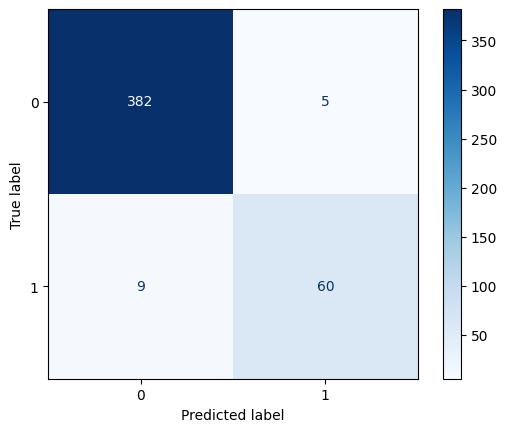

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


# Menghitung dan menampilkan confusion matrix
cm = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       387
           1       0.92      0.87      0.90        69

    accuracy                           0.97       456
   macro avg       0.95      0.93      0.94       456
weighted avg       0.97      0.97      0.97       456



#### HASIL DAN ANALISIS
Adapun analisis yang dapat kita lakukan yakni membandingkan hasil dari masing-masing model yang telah dibuat (k-Nearest Neighbor dan Naive Bayes). Adapun analisisnya adalah sebagai berikut:
1.   **Precision**
   *   **Class 0** : Naive Bayes dan kNN memiliki precision (0.96). Ini menunjukkan bahwa semua prediksi positif Naive Bayes dan kNN untuk Class 0 cukup tepat.
   *   **Class 1**: kNN memiliki percision yang  lebih tinggi (0.93) dibandingkan Naive Bayes (0.93). Ini berarti kNN lebih baik dalam mengidentifikasi Class 1.
2.   **Recall**
    *   **Class 0** : kNN memiliki recall lebih tinggi (0.99) dibandingkan Naive Bayes (0.98). Ini menunjukkan bahwa kNN lebih baik dalam menangkap semua instance Class 0.
   *   **Class 1**: Naive Bayes dan kNN memiliki nilai recall (0.80), ini berarti keduanya sama-sama mampu menangkap instance Class 1 dengan tepat.

2.   **F1-Score**
    *   **Class 0** : kNN memiliki f1-score (0.98) sedikit lebih tinggi dibandingkan Naive Bayes (0.97). Ini menunjukkan bahwa kNN lebih baik secara keseluruhan dalam menangani Class 0 dengan keseimbangan antara precision dan recall.
   *   **Class 1**: kNN memiliki f1-score (0.86) lebih tinggi dibandingkan Naive Bayes (0.84). Ini menunjukkan bahwa kNN lebih baik secara keseluruhan dalam menangani Class 1, dengan keseimbangan yang lebih baik antara precision dan recall.

3.   **Class 0 vs Class 1**
   *  Pada setiap metrik evaluasi yang dilakukan, baik precision, recall, dan f1-score, pada kedua metode cenderung nilai class 1 (kategori senior) lebih rendah dibandingkan class 0. Hal ini dikarenakan adanya **imbalanced data** pada kolom target, yang mana ** kelas senior** terdiri dari 364 baris dan **kelas adult** terdiri dari 1914 baris .










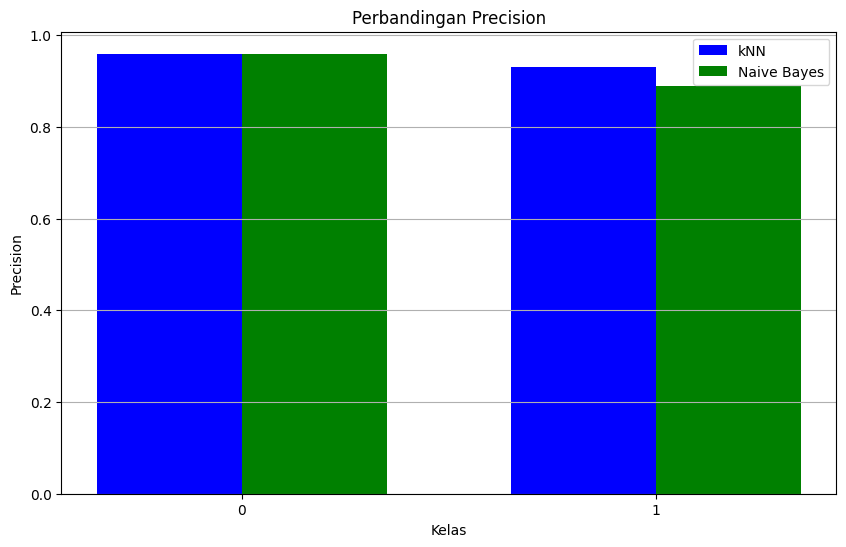

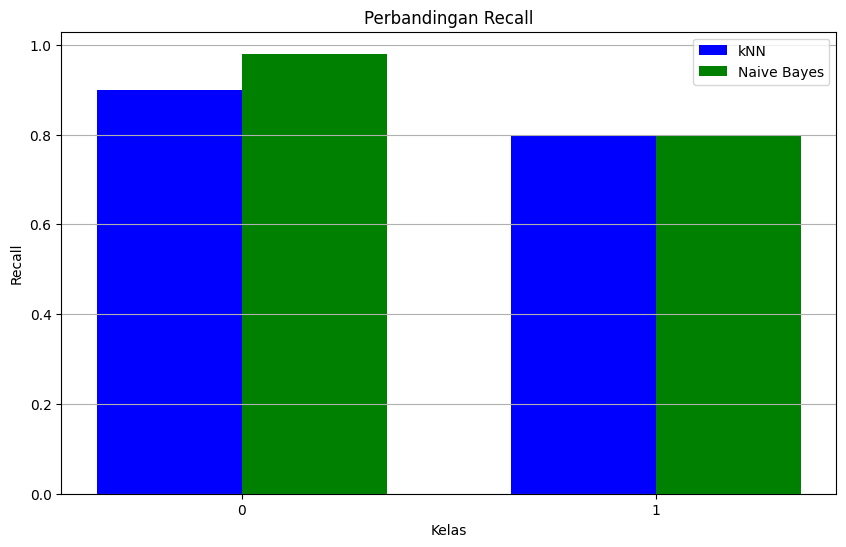

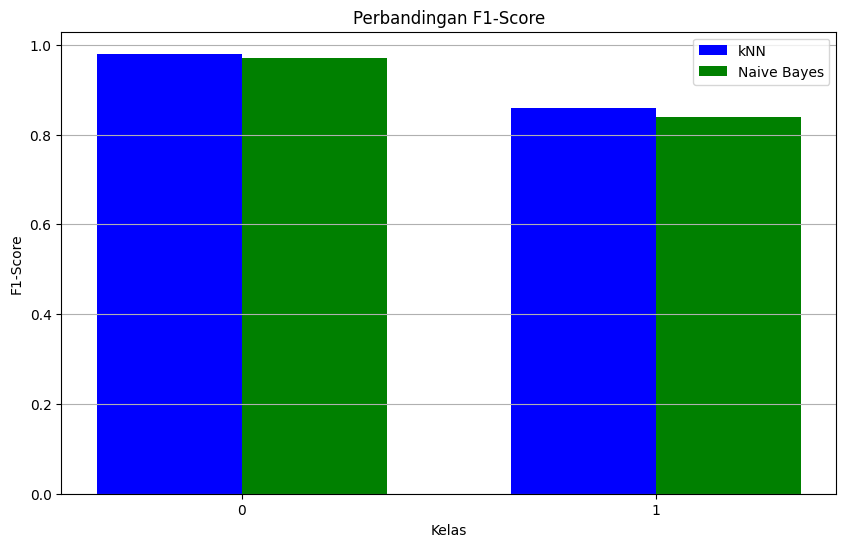

In [ ]:
import matplotlib.pyplot as plt

# Data skor kNN
precision_knn = [0.96, 0.93]
recall_knn = [0.90, 0.80]
f1_score_knn = [0.98, 0.86]

# Data skor Naive Bayes
precision_nb = [0.96, 0.89]
recall_nb = [0.98, 0.80]
f1_score_nb = [0.97, 0.84]

# Lebar bar untuk plot
bar_width = 0.35

# Membuat plot precision
plt.figure(figsize=(10, 6))
index = range(len(precision_knn))
plt.bar(index, precision_knn, bar_width, label='kNN', color='b')
plt.bar([i + bar_width for i in index], precision_nb, bar_width, label='Naive Bayes', color='g')
plt.title('Perbandingan Precision')
plt.xlabel('Kelas')
plt.ylabel('Precision')
plt.xticks([i + bar_width / 2 for i in index], ['0', '1'])
plt.legend()
plt.grid(axis='y')
plt.show()

# Membuat plot recall (dengan kode serupa)
plt.figure(figsize=(10, 6))
plt.bar(index, recall_knn, bar_width, label='kNN', color='b')
plt.bar([i + bar_width for i in index], recall_nb, bar_width, label='Naive Bayes', color='g')
plt.title('Perbandingan Recall')
plt.xlabel('Kelas')
plt.ylabel('Recall')
plt.xticks([i + bar_width / 2 for i in index], ['0', '1'])
plt.legend()
plt.grid(axis='y')
plt.show()

# Membuat plot f1-score (dengan kode serupa)
plt.figure(figsize=(10, 6))
plt.bar(index, f1_score_knn, bar_width, label='kNN', color='b')
plt.bar([i + bar_width for i in index], f1_score_nb, bar_width, label='Naive Bayes', color='g')
plt.title('Perbandingan F1-Score')
plt.xlabel('Kelas')
plt.ylabel('F1-Score')
plt.xticks([i + bar_width / 2 for i in index], ['0', '1'])
plt.legend()
plt.grid(axis='y')
plt.show()


#### Kesimpulan

*   Algoritma Naive Bayes didasarkan pada Teorema Bayes dengan asumsi independensi antar fitur. Metode ini cepat dan efisien untuk data berukuran besar serta memberikan probabilitas klasifikasi.
*   Algoritma k-Nearest Neighbors (kNN) cenderung sederhana dalam mengklasifikasikan titik data baru berdasarkan mayoritas label dari k tetangga terdekatnya dalam ruang fitur.  
*   Kedua algoritma menggunakan k-fold cross validation dalam proses validasi. Pada proses validasi akan dipilih best hyperparameter (kNN : k, naive bayes: alpha), setelah best hyperparamter terplih maka dilakukan pengujian model pada data test.
*   Akurasi yang diberikan antara kedua metode cenderung tinggi, namun apabila dibandingkan, kNN cenderung lebih baik.
*   Untuk perbandingan keduanya, kNN cenderung lebih unggul, dengan keseimbangan antara precision dan recall (nilai F1-score) lebih tinggi dibandingkan dengan Naive Bayes.
*   Meskipun model kNN dianggap lebih baik berdasarkan F1-score, komputasi yang dibutuhkan oleh kNN sangat lama, apalagi dengan data yang besar. Maka perlu dipertimbangkan juga terkait komputasi/kompleksitas data.

